Date          datetime64[ns]
Away Team            float64
Home Team              int64
Away Score             int64
Home Score             int64
Away OR              float64
Away DR              float64
Away AT              float64
Home OR              float64
Home DR              float64
Home AT              float64
delta OR             float64
delta DR             float64
delta AT             float64
dtype: object
Explained Variance Ratio: [0.3057662  0.22358676 0.20173168]
K-Means Cluster Distribution:
KMeans_Cluster
2    157
0    145
3    132
1    125
Name: count, dtype: int64

GMM Cluster Distribution:
GMM_Cluster
1    169
2    151
4    111
3     79
0     49
Name: count, dtype: int64
Cluster Distribution for KMeans_Cluster:
KMeans_Cluster
2    157
0    145
3    132
1    125
Name: count, dtype: int64

Cluster Means:
                   Away OR     Away DR    Away AT     Home OR     Home DR  \
KMeans_Cluster                                                              
0             

/var/folders/k_/pmqjk3sj7bs3l1kjhr3dw7qm0000gn/T/ipykernel_4068/113708340.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


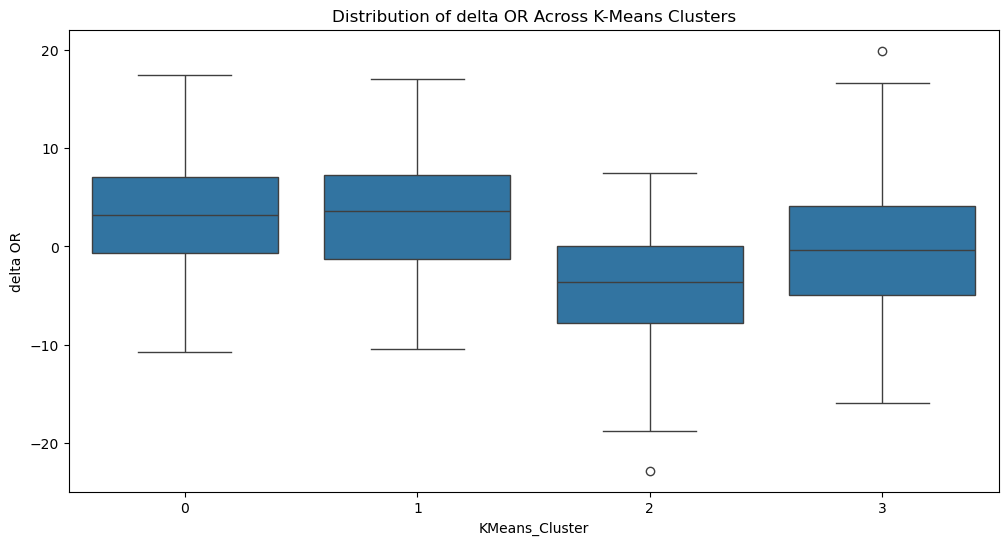

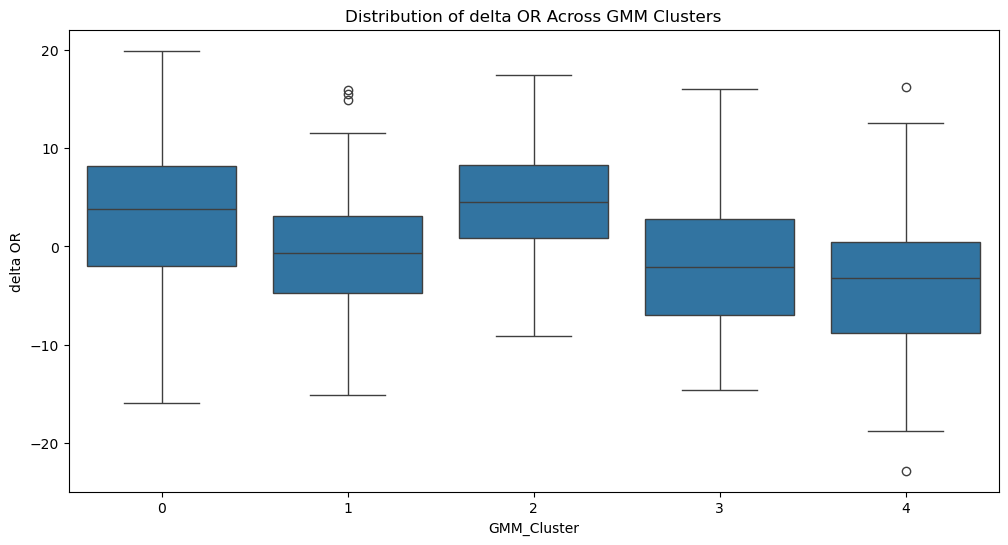

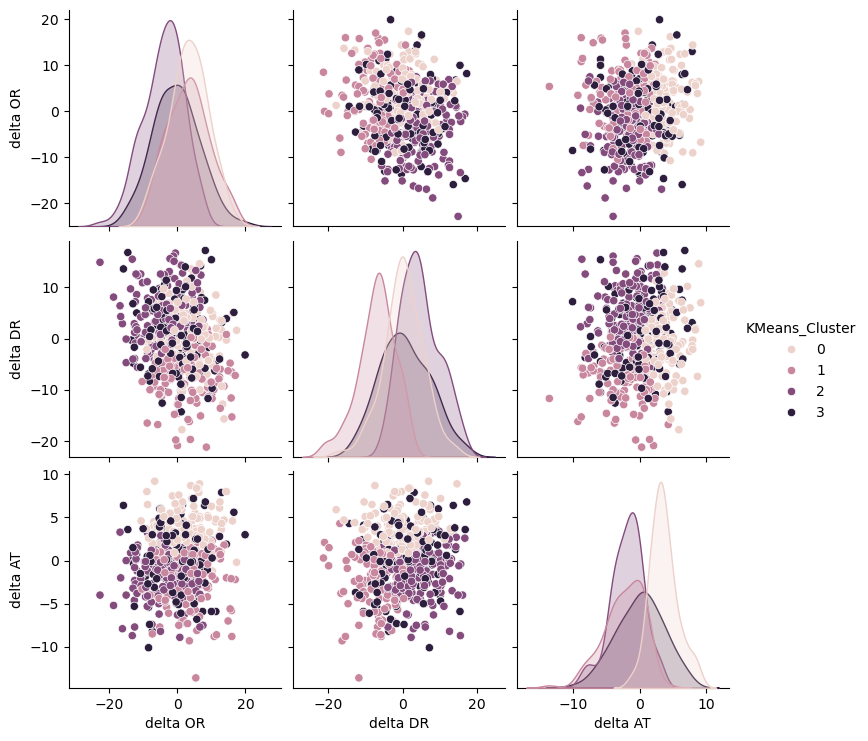

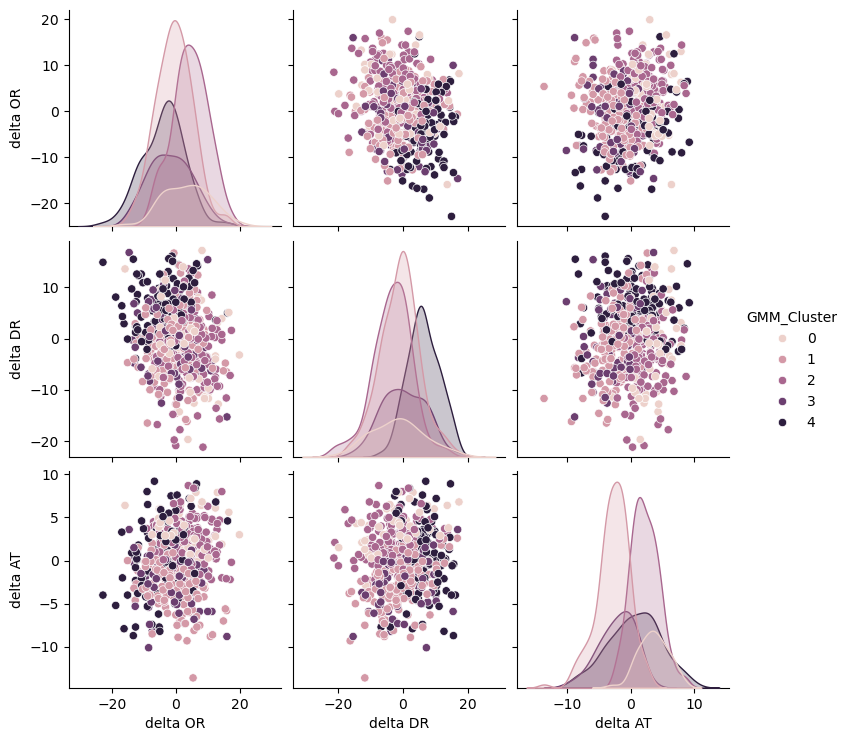

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/Users/kkelley/Desktop/CBB Results/CBBML.csv')

# Convert the 'Date' column to datetime type (if you want to use it later)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop missing values before analysis
df.dropna(inplace=True)

# Round numeric columns for clarity
df = df.round(2)

# Print data types to confirm correct types
print(df.dtypes)

# List of numeric columns for analysis
numeric_columns = [
    #'Away Team', 'Home Team', 'Away Score', 'Home Score', 
    'Away OR', 'Away DR', 'Away AT', 
    'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT'
]

# Explicitly convert these columns to numeric (if needed)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define features for clustering (excluding Date)
features = [
    'Away OR', 'Away DR', 'Away AT',
    'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT'
]
X = df[features]

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA (reduce to 3 components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_pca)

# Check cluster distribution
print("K-Means Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())
print("\nGMM Cluster Distribution:")
print(df['GMM_Cluster'].value_counts())

# Cluster Statistics
def cluster_analysis(df, cluster_col):
    print(f"Cluster Distribution for {cluster_col}:")
    print(df[cluster_col].value_counts())
    print("\nCluster Means:")
    print(df.groupby(cluster_col)[numeric_columns].mean())

# Analyze Clusters
cluster_analysis(df, 'KMeans_Cluster')
cluster_analysis(df, 'GMM_Cluster')

# Visualization of delta OR distribution across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_Cluster', y='delta OR', data=df)
plt.title("Distribution of delta OR Across K-Means Clusters")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='GMM_Cluster', y='delta OR', data=df)
plt.title("Distribution of delta OR Across GMM Clusters")
plt.show()

# Pairplot for clustering visualization
sns.pairplot(df, hue='KMeans_Cluster', vars=['delta OR', 'delta DR', 'delta AT'])
plt.show()

sns.pairplot(df, hue='GMM_Cluster', vars=['delta OR', 'delta DR', 'delta AT'])
plt.show()




